# Investment Value

In [12]:
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime
import pandas as pd
# no keys required for crypto data
client = CryptoHistoricalDataClient()
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["ETH/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime(2022, 7, 1),
                        end=datetime(2022, 9, 1)
                 )
bars = client.get_crypto_bars(request_params)
# convert to dataframe
bars_df = bars.df["close"]
bars_df = pd.DataFrame(bars_df)
# access bars as list - important to note that you must access by symbol key
# even for a single symbol request - models are agnostic to number of symbols
#bars["BTC/USD"]
bars_df.head()

close
symbol  timestamp                         
ETH/USD 2022-07-01 05:00:00+00:00  1044.11
        2022-07-02 05:00:00+00:00  1070.45
        2022-07-03 05:00:00+00:00  1054.18
        2022-07-04 05:00:00+00:00  1149.50
        2022-07-05 05:00:00+00:00  1131.76

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


%matplotlib inline

## Load and Verify Environment Variables

In [3]:
# Load .env environment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("SECRET")
SYMBOL = 'ETHUSD'

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Create the Alpaca API Object

In [6]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Set a variable `today` with current date using ISO format

In [7]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

## Set a variable `timeframe` with value equal to `1Day`

In [8]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

In [9]:
alpaca_df = pd.DataFrame()

## Create a DataFrame with current price data for `MSFT` & `AAPL` using `alpaca.get_bars()`

In [10]:
# Get current price data for MSFT and AAPL
alpaca_df = alpaca.get_bars(
    SYMBOL,
    timeframe,
    start = today,
    end = today
).df

alpaca_df.head()

""


In [11]:


# Reorganize the DataFrame
# Separate ticker data
AAPL = df_portfolio[df_portfolio['symbol']=='AAPL'].drop('symbol', axis=1)
MSFT = df_portfolio[df_portfolio['symbol']=='MSFT'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AAPL, MSFT],axis=1, keys=['AAPL','MSFT'])

# Display sample data
df_portfolio

NameError: name 'df_portfolio' is not defined

## Calculate the current value in dollars of the stock portfolio

In [10]:
# Fetch the current closing prices from the DataFrame
msft_price = float(df_portfolio["MSFT"]["close"])
aapl_price = float(df_portfolio["AAPL"]["close"])

In [11]:
# Compute the current value in dollars of the stock portfolio
msft_value = msft_price * df_shares.loc["MSFT"]["shares"]
aapl_value = aapl_price * df_shares.loc["AAPL"]["shares"]

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['MSFT']['shares']} MSFT shares is ${msft_value:0.2f}")
print(f"The current value of the {df_shares.loc['AAPL']['shares']} AAPL shares is ${aapl_value:0.2f}")

The current value of the 200 MSFT shares is $41670.00
The current value of the 320 AAPL shares is $124233.60


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [12]:
# Set the data for the shares value DataFrame
value_data = {
    "MSFT": [msft_value],
    "AAPL": [aapl_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,MSFT,AAPL
0,41670.0,124233.6


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='shares'>

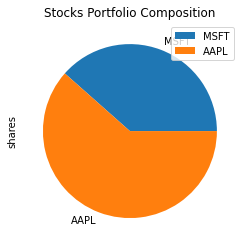

In [13]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

<AxesSubplot:title={'center':'Current Value in Dollars of Stock Portfolio'}>

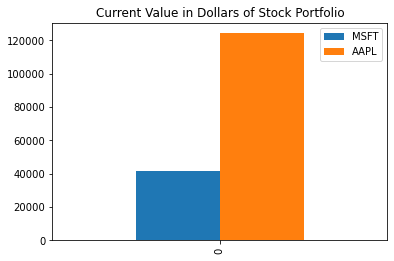

In [14]:
# Create a bar plot to show the value of shares
df_value.plot.bar(title="Current Value in Dollars of Stock Portfolio")